# Word Search 

Given an `m x n` grid of characters board and a string word, return `true` if __word__ exists in the grid. 

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than one. 

### Example 1:

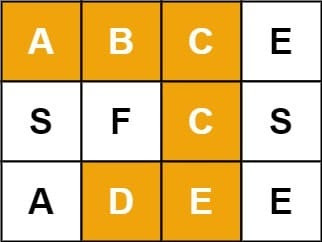

```
Input: board: [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]

word: "ABCCED"

Output: True
```

### Example 2:

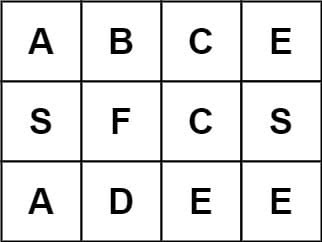

```
Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]

word = "ABCB"

Output: false
```

In [24]:
def build_neighboring(board, r, c):
    neighbors = []
    # Up cell
    if r - 1 >= 0:
        neighbors.append((board[r - 1][c], (r - 1, c)))
    # Right cell
    if c + 1 <= len(board[r]) - 1:
        neighbors.append((board[r][c + 1], (r, c + 1)))
    # Down cell
    if r + 1 <= len(board) - 1:
        neighbors.append((board[r + 1][c], (r + 1, c)))
    # Left cell
    if c - 1 >= 0:
        neighbors.append((board[r][c - 1], (r, c - 1)))
    
    return neighbors


def word_search(board: list[list[str]], word: str) -> bool:
    # Loop through all the cells of the board
    for r in range(len(board)):
        for c in range(len(board[r])):
            # For each of the cell, check if it is equal to the first letter of the word to search. If it is, then start looking for the other letters
            word_idx = 0
            stack = []
            visited = []
            found = False

            if board[r][c] == word[word_idx]:
                word_idx += 1
                # Add the current cell to the stack
                stack.append((r, c))
                visited.append((r, c))

                # Loop through all the cells in the stack
                while len(stack) != 0:
                    # Pop the last added cell
                    curr_cell = stack.pop()

                    # Retrieve neighboring cells.
                    neighbors = build_neighboring(board, curr_cell[0], curr_cell[1])

                    # Loop through all the neighbors and check if they are equal to the next character in the word to search
                    for cell in neighbors:
                        curr_char = cell[0]
                        curr_cell_coord = cell[1]

                        # Check if the curr_char is equal to the next character in the word to search
                        if curr_char == word[word_idx]:
                            # Check if the cell has not been visited yet
                            if curr_cell_coord not in visited:
                                # In this case add the cell coordinates of the character to the stack
                                stack.append(curr_cell_coord)
                                # Add it as well to the visited collection
                                visited.append(curr_cell_coord)
                                
                                found = True
                                # Check if we have found the entire word in the matrix. We have reached the end of word_idx
                                if word_idx == len(word) - 1:
                                    return True

                    if found:
                        # increment the word_idx
                        word_idx += 1
                        found = False
    return False

board = [["A","B","C","E"],
        ["S","F","C","S"],
        ["A","D","E","E"]]

# word = "ABCCED" # True
# word = "ABCB" # False
word = "SCEEE"

print(word_search(board, word))

False


# Solution - More polished solution

To solve this problem, we'll use a _depth-first search (DFS) approach with backtracking_. The idea is to start at each cell of the board and try to match the characters of the word by exploring adjacent cells recursively.

We'll define a helper function that perform DFS. This function will check if the current cell matches the current character of the word and then explore its neighboring cells. We'll use a visited set to ensure we don't use the same cell more than once.

The time complexity is $O(m * n * 4^L)$, where $m$ and $n$ are the dimensions of the board, and $L$ is the length of the word. In the worst case, we might explore 4 directions for each character of the word.

In [26]:
def exist(board: list[list[str]], word:str) -> bool:
    # Get board dimensions
    m, n = len(board), len(board[0])
    # DFS helper function to search for word
    def dfs(i, j, k):
        # Base case: if we've matched all characters
        if k == len(word):
            return True
        # Check if out of bounds or character doesn't match
        if (i < 0 or i >= m or j < 0 or j >= n or board[i][j] != word[k]):
            return False
        # Mark current cell as visited
        temp = board[i][j]
        board[i][j] = '#'

        # Explore 4 directions
        result = (dfs(i+1, j, k+1) or
                  dfs(i-1, j, k+1) or
                  dfs(i, j+1, k+1) or 
                  dfs(i, j-1, k+1))
        
        # Restore the cell
        board[i][j] = temp

        return result

    # try starting the search from each cell
    for i in range(m):
        for j in range(n):
            if dfs(i, j, 0):
                return True

    return False

board = [["A","B","C","E"],
        ["S","F","C","S"],
        ["A","D","E","E"]]

word = "ABCCED" # True
# word = "ABCB" # False
# word = "SCEEE"

print(exist(board, word))

True
